In [1]:


import numpy as np
import matplotlib.pyplot as plt
# import skimage.io as io
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import csv


# Image read and write/save image using [scikit-image](https://scikit-image.org/)

For installation please go through: https://scikit-image.org/docs/stable/user_guide/install.html

# <font color='red'>Warning: Please do not use the command sudo and pip together as pip may overwrite critical system libraries which may require you to reinstall your operating sriver_river_river_river_river_river_river_river_river_ystem.</font>


band1 image size: (512, 512)


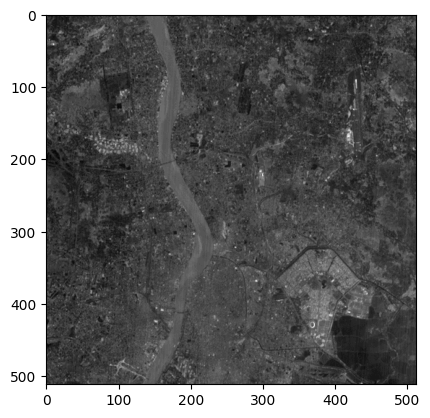

In [2]:
# IMAGE FILE NAME YOU WANT TO READ
img_filename = 'data/band1.gif'

img = plt.imread(img_filename).astype('double').mean(axis=2)

print('band1 image size: {}' .format(img.shape))

# DISPLAY
plt.imshow(img, cmap='gray')
plt.show()


In [3]:
def get_pixel_intensity(image, x, y):
    """Get intensity of pixel at given coordinates (x, y) in the image."""
    intensity = image[y, x]
    return intensity


<h1> River

In [4]:

river_x = []
river_y = []


with open('data/annotated_points_band4_np_50.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        river_x.append(float(row['row']))
        river_y.append(float(row['column']))



<h1> Reading Images 

In [5]:
img_1= plt.imread('data/band1.gif').astype('double').mean(axis=2)
img_2= plt.imread('data/band2.gif').astype('double').mean(axis=2)
img_3= plt.imread('data/band3.gif').astype('double').mean(axis=2)
img_4= plt.imread('data/band4.gif').astype('double').mean(axis=2)

<h1> Intensity Capturing 

In [6]:
img_1_intensity=[]
for i in range (len(river_x)):
    intensity = get_pixel_intensity(img_1,int(river_x[i]),int(river_y[i]))
    img_1_intensity.append(intensity)

In [7]:
img_2_intensity=[]
for i in range (len(river_x)):
    intensity = get_pixel_intensity(img_2,int(river_x[i]),int(river_y[i]))
    img_2_intensity.append(intensity)

In [8]:
img_3_intensity=[]
for i in range (len(river_x)):
    intensity = get_pixel_intensity(img_3,int(river_x[i]),int(river_y[i]))
    img_3_intensity.append(intensity)

In [9]:
img_4_intensity=[]
for i in range (len(river_x)):
    intensity = get_pixel_intensity(img_4,int(river_x[i]),int(river_y[i]))
    img_4_intensity.append(intensity)

<h1> Dataframe - River  

In [10]:
df_1 = pd.DataFrame({
    'X' : river_x,
    'Y' : river_y,
    'Band_1': img_1_intensity,
    'Band_2': img_2_intensity,
    'Band_3': img_3_intensity,
    'Band_4': img_4_intensity,
    'label' : "0"
},index=pd.RangeIndex(start=1, stop=len(img_1_intensity)+1))


<h1> Covariance 

In [11]:
df_small_river=df_1.iloc[:,2:6]

river_covariance=[]
covariance_matrix_river = np.cov(df_small_river, rowvar=False)
river_covariance=np.array(covariance_matrix_river)
river_covariance

array([[ 8.26530612,  7.47091837, 11.89515306,  7.87729592],
       [ 7.47091837,  7.41030612, 11.58841837,  7.6555102 ],
       [11.89515306, 11.58841837, 19.50979592, 14.06387755],
       [ 7.87729592,  7.6555102 , 14.06387755, 34.72255102]])

<h1> Mean

In [12]:
river_mean=[]
column_means_river= df_small_river.mean(axis=0)
river_mean=np.array(column_means_river)
river_mean

array([94.95, 83.73, 84.27, 89.37])

<h1> Non-River <h1>

In [13]:
non_river_x = []
non_river_y = []

with open('data/annotated_points_band4_np_150.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        non_river_x.append(float(row['row']))
        non_river_y.append(float(row['column']))


<h1> Intensity Capturing 

In [14]:
img_1_intensity=[]
for i in range (len(non_river_x)):
    intensity = get_pixel_intensity(img_1,int(non_river_x[i]),int(non_river_y[i]))
    img_1_intensity.append(intensity)

In [15]:
img_2_intensity=[]
for i in range (len(non_river_x)):
    intensity = get_pixel_intensity(img_2,int(non_river_x[i]),int(non_river_y[i]))
    img_2_intensity.append(intensity)

In [16]:
img_3_intensity=[]
for i in range (len(non_river_x)):
    intensity = get_pixel_intensity(img_3,int(non_river_x[i]),int(non_river_y[i]))
    img_3_intensity.append(intensity)

In [17]:
img_4_intensity=[]
for i in range (len(non_river_x)):
    intensity = get_pixel_intensity(img_4,int(non_river_x[i]),int(non_river_y[i]))
    img_4_intensity.append(intensity)

<h1> Dataframe- Non_River

In [18]:
df_2 = pd.DataFrame({
    'X' : non_river_x,
    'Y' : non_river_y,
    'Band_1': img_1_intensity,
    'Band_2': img_2_intensity,
    'Band_3': img_3_intensity,
    'Band_4': img_4_intensity,
    'label' : "1"
},index=pd.RangeIndex(start=1, stop=len(img_1_intensity)+1))



<h1> Covariance

In [19]:
df_small_non_river=df_2.iloc[:,2:6]

non_river_covariance=[]
covariance_matrix_non_river = np.cov(df_small_non_river, rowvar=False)
non_river_covariance=np.array(covariance_matrix_non_river)
non_river_covariance

array([[ 3.76449664,  3.18271812,  4.1513255 , -0.19389262],
       [ 3.18271812,  3.31019295,  4.13531879,  0.88301174],
       [ 4.1513255 ,  4.13531879,  6.75543624,  1.10401007],
       [-0.19389262,  0.88301174,  1.10401007, 19.99683725]])

<h1> Mean

In [20]:
non_river_mean=[]
column_means_non_river= df_small_non_river.mean(axis=0)
non_river_mean=np.array(column_means_non_river)
non_river_mean

array([94.16 , 82.975, 83.61 , 89.235])

In [21]:
df_small_non_river.describe()

,Band_1,Band_2,Band_3,Band_4
count,150.000000,150.000000,150.000000,150.000000
mean,94.160000,82.975000,83.610000,89.235000
std,1.940231,1.819394,2.599122,4.471782
min,90.000000,78.750000,77.250000,77.250000
25%,93.000000,81.750000,81.750000,87.000000
50%,94.500000,82.500000,83.625000,88.875000
75%,95.250000,84.000000,84.750000,92.250000
max,100.500000,89.250000,92.250000,105.750000


<h1> Multivariate Gaussian Function 

In [22]:
def multivariate_gaussian(x, mean, covariance):
    n = len(x)
    det = np.linalg.det(covariance)
    inv_covariance = np.linalg.inv(covariance)
    exponent = -0.5 * np.dot(np.dot((x - mean).T, inv_covariance), (x - mean))
    prefactor = 1 / ((2 * np.pi) ** (n / 2) * det ** 0.5)
    return prefactor * np.exp(exponent)

<h1> Image (512 X 512 X 4)

In [23]:
stacked_images = np.stack((img_1, img_2, img_3, img_4), axis=-1)

In [24]:
final_image_array=[]
prior_river = 50/200
prior_non_river =150/200

for i in range (512):
    for j in range (512):
        dist_river=multivariate_gaussian(stacked_images[i,j],river_mean,river_covariance)
        class_value_river=prior_river*dist_river
        dist_non_river=multivariate_gaussian(stacked_images[i,j],non_river_mean,non_river_covariance)
        class_value_non_river=prior_non_river*dist_non_river

        if class_value_river>class_value_non_river:
            final_image_array.append(0)
        else:
            final_image_array.append(1)



<h1> Classifying Image

In [25]:

final_image= np.array(final_image_array).reshape(512, 512)

plt.imsave('image.png',final_image,cmap='gray')

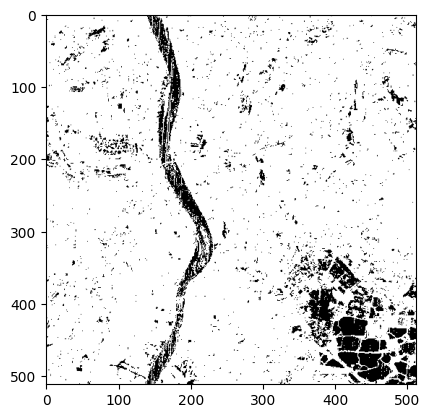

In [26]:
plt.imshow(final_image, cmap='gray')
plt.show()

In [27]:
merged_df = pd.concat([df_1, df_2], ignore_index=True)


In [28]:
merged_df_small=merged_df.iloc[:,:2]


In [29]:
pred_list=[]
for i in range (200):
    pred=final_image[int(merged_df_small.loc[i,'X'])][int(merged_df_small.loc[i,'Y'])]
    pred_list.append(pred)

In [30]:
y_label=merged_df.iloc[:,6:7]
y_true=y_label['label'].values
str_pred_list=[str(value) for value in pred_list]

<h1> Accuracy

In [31]:
accuracy=np.mean(y_true==str_pred_list)
print("Accuracy is : ", accuracy *100 ,"%")

Accuracy is :  90.5 %


<h1> Confusion Matrix 

In [32]:
conf_matrix = confusion_matrix(y_true, str_pred_list)
conf_matrix

array([[ 38,  12],
       [  7, 143]])

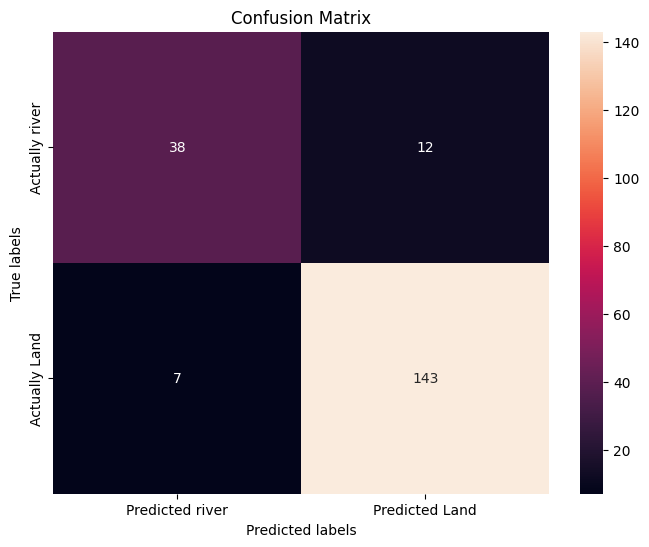

In [33]:

# labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d',xticklabels=['Predicted river', 'Predicted Land'], yticklabels=['Actually river', 'Actually Land'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()